# AgML Synthetic Data Pipeline

AgML provides access to a pipeline for generating synthetic agricultural data, including both imagery and annotations, using the **Helios** library (https://baileylab.ucdavis.edu/software/helios/).

This pipeline is located in the `agml.synthetic` module, and this notebook will demonstrate how to use this API.



In [ ]:
!pip install -q agml

In [1]:
import agml

from pprint import pprint

## Introduction

The `HeliosOptions` class provides an interface to customize the data which you want to generate through the Helios API. To begin, select the canopy which you want to use. A list of available canopies can be found [here](https://baileylab.ucdavis.edu/software/helios/_canopy_generator_doc.html), or using the method `agml.synthetic.available_canopies()`.

**Note**: If this is your first time using the Helios API, then this stage will both install and compile Helios, and thus take a longer period of time.

In [2]:
# List available canopies.
pprint(agml.synthetic.available_canopies())

['HomogeneousCanopy',
 'SphericalCrownsCanopy',
 'VSPGrapevine',
 'SplitGrapevine',
 'UnilateralGrapevine',
 'GobletGrapevine',
 'WhiteSpruceCanopy',
 'Tomato',
 'Strawberry',
 'WalnutCanopy',
 'SorghumCanopy',
 'Bean']


You can find information about the parameters for each canopy using the method `agml.synthetic.default_canopy_parameters`.

In [3]:
# Let's use the Tomato canopy.
pprint(agml.synthetic.default_canopy_parameters('Tomato'))

{'canopy_origin': [0, 0, 0],
 'canopy_rotation': 0,
 'fruit_color': [0.7, 0.28, 0.2],
 'fruit_radius': 0.03,
 'fruit_subdivisions': 8,
 'leaf_length': 0.2,
 'leaf_subdivisions': [4, 3],
 'leaf_texture_file': '/Users/amoghjoshi/Documents/Amogh/Programs/Python/AgML/agml/_helios/Helios/plugins/canopygenerator/textures/TomatoLeaf_big.png',
 'plant_count': [3, 3],
 'plant_height': 1.0,
 'plant_spacing': 2,
 'row_spacing': 2,
 'shoot_color': [0.35, 0.45, 0.2],
 'shoot_subdivisions': 10}


## Generating Data

When generating data using Helios, you'll select a canopy and then modify the parameters for the canopy to customize your output. This is done using the `HeliosOptions` class. 

The `HeliosOptions` class provides three levels of customizability. You start by selecting your canopy:

In [4]:
opt = agml.synthetic.HeliosOptions('Tomato')

The first level of customization is **Task Setup**. Here, you can modify the annotations for your data, as well as the labels.

In [9]:
# Creating a semantic segmentation task with fruits and leaves labeled.
opt.annotation_type = agml.synthetic.AnnotationType.semantic_segmentation
opt.labels = ['fruits', 'leaves']

The second level of customization is **Environment Setup**. Here, you can adjust the camera angles and positioning, allowing you to customize the perspective of generated images.

The `HeliosOptions.camera.generate_positions` method automatically computes camera position vectors based on the parameters like the number of camera views you want, distance from crops, as well as `camera_type`: you can select `linear`, which provides a row of ground camera vectors, `circular`, which provides perspectives from all ground angles, and `aerial`, which provides a top-down view of the plants.

In [6]:
# Generate camera position vectors and select image resolution.
opt.camera.generate_positions(camera_type = 'circular', num_views = 3, crop_distance = 3)
opt.camera.image_resolution = [512, 512]

Finally, the third level of customization is **Canopy Setup**. Here, you can adjust the geometry and texture of the generated canopy, using the parameters above.

In [7]:
# Editing a few parameters to change plant geometry.
opt.canopy.plant_count = [4, 4]
opt.canopy.fruit_radius = 0.05
opt.canopy.plant_height = 0.9

To generate the actual data, the `HeliosDataGenerator` provides a direct interface into the Helios API. It is instantiated directly from the options you give, and then you can select the number of images you want as well as the name of the dataset.

By default, the dataset will be saved to `~/.agml/synthetic`, though this can be changed using `agml.backend.set_synthetic_save_path`.

*Note*: The total number of images in the dataset will be the number of images provided during generation times the number of views for each camera.

In [10]:
# Construct the data generator.
generator = agml.synthetic.HeliosDataGenerator(opt)

# Generate the data.
generator.generate(name = 'tomato_sample', num_images = 3)

Loading XML file: /Users/amoghjoshi/Documents/Amogh/Programs/Python/AgML/agml/_helios/Helios/projects/SyntheticImageAnnotation/xml/style_tomato_sample.xml...done.
Reading XML file: /Users/amoghjoshi/Documents/Amogh/Programs/Python/AgML/agml/_helios/Helios/projects/SyntheticImageAnnotation/xml/style_tomato_sample.xml...Building canopy of tomato plants...done.
Ground geometry...done.
Ground consists of 100 total primitives.
done.
Rendering RGB image containing 83.364K primitives...Initializing graphics...done.
writing JPEG image: /Users/amoghjoshi/.agml/synthetic/tomato_sample/image0/view00000/RGB_rendering.jpeg
writing JPEG image: /Users/amoghjoshi/.agml/synthetic/tomato_sample/image0/view00001/RGB_rendering.jpeg
writing JPEG image: /Users/amoghjoshi/.agml/synthetic/tomato_sample/image0/view00002/RGB_rendering.jpeg
done.
Generating labeled image containing 2 label groups...
Initializing graphics...done.
Performing semantic segmentation for view 0... and element: 
clusters
leaves
Semanti

By default, the generator converts the format of the dataset to one ready for the `AgMLDataLoader`. You can use the `AgMLDataLoader.helios` method to load a dataset directly by name.

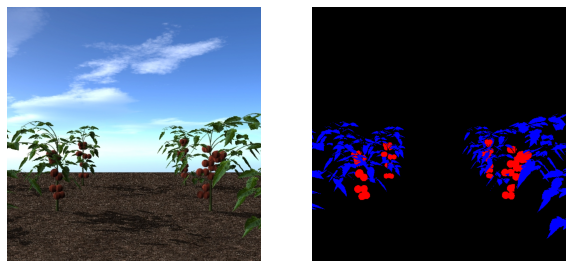

In [13]:
loader = agml.data.AgMLDataLoader.helios('tomato_sample')
_ = agml.viz.visualize_image_and_mask(loader[0])

## Next Steps

You're now ready to use `agml.synthetic` to generate synthetic agricultural data with Helios. 